In [15]:
# !pip install nibabel

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.3 MB 13.7 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 파일 경로 관련
import os
from pathlib import Path
from glob import glob

# 이미지 파일 관련
from PIL import Image
import nibabel as nib
from IPython.display import display

import cv2

# OASIS-2

### 1. OASIS-2 dataset 가져오기

In [2]:
len(glob('../OASIS-2 dataset/OAS2_*'))

60

In [105]:
df_demographic = pd.read_excel('../OASIS-2 dataset/demographics.xlsx')
display(df_demographic.head(5))
df_demographic.shape

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


(373, 15)

In [70]:
# 'OASIS-2 dataset' 폴더 경로
data_dir = '../OASIS-2 dataset/'

img_paths = sorted(glob(os.path.join(data_dir, '**/*.nifti.img'), recursive=True))
imgs = []

for img_path in img_paths:

    try:
        img_arr = nib.load(img_path).get_fdata()
        imgs.append(img_arr)
        
    except Exception as e:
        print(f"{img_path} : {e}")


# 이미지 파일 개수 확인
print(len(imgs))

../OASIS-2 dataset/OAS2_0004_MR2/mpr-1.nifti.img
        Cannot work out file type of "../OASIS-2 dataset/OAS2_0004_MR2/mpr-1.nifti.img"
220


220


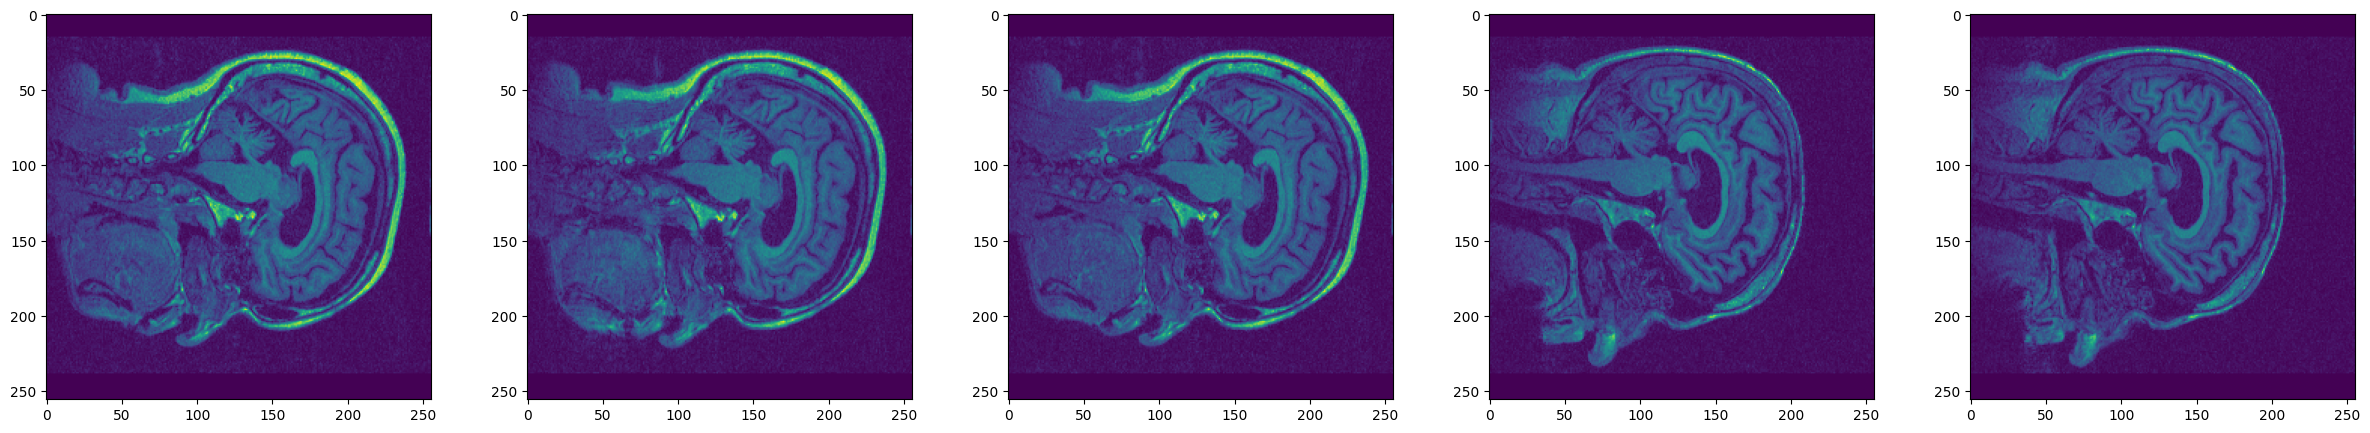

In [110]:
# 3차원 이미지(영상)이기 때문에, 원하는 영역만을 불러와야 하는 것 같다.
fig, axes = plt.subplots(1, 5, figsize=(30, 5))
for i in range(5):
    axes[i].imshow(imgs[i][:, :, 60]);
print(len(imgs))

In [ ]:
axes[0].imshow(imgs[0][:,:,60])
axes[1].imshow(imgs[1][:,:,127])

In [72]:
# 59층의 이미지만 가져오기
temp_imgs = [img[:,:,59] for img in imgs]

### U-net 모델

# Hippocampus

In [54]:
original_dir_path = Path('../Hippocampus dataset/original/35')
label_dir_path = Path('../Hippocampus dataset/label/35label')

In [55]:
original_paths = list(original_dir_path.glob(r"**/*.jpg"))
label_paths = list(label_dir_path.glob(r"**/*.jpg"))

In [56]:
len(original_paths)

6615

In [58]:
len(label_paths)

13230

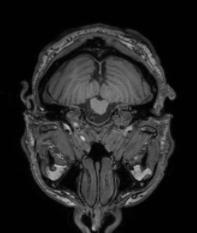

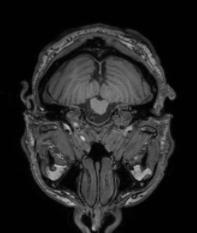

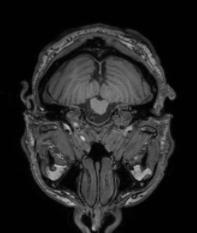

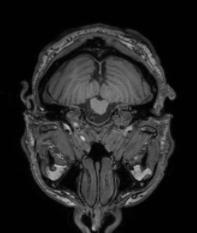

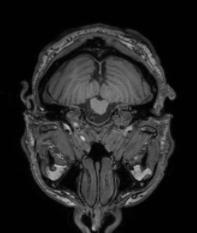

In [140]:
for i in range(5):
    Image.open(original_paths[i])
    display(img)